# Задача классификации

### Выбор предметной области 

В качестве предметной области мной была выбрана классификация студентов на успевающих и неуспевающих. Мною был взят [следующий датасет](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams) с Kaggle. В нём представлена информация о студентах: 
- пол, 
- этническая принадлежность, 
- финансовый уровень, 
- уровень образования родителей, 
- прохождение подготовительных курсов,
- баллы по математике,
- баллы по литературе,
- баллы по письму.
Ограничимся только экзаменом по математике и установим шкалу прохождения экзамена в 70 баллов. Каждый студент либо прошел экзамен, либо нет. 

Задача классификации состоит в том, чтобы определить пройдёт ли пользователь экзамен по математике на основе имеющихся данных. 
На основе предварительной оценки о прохождении/непрохождении экзамена можно рекомендовать дополнительные курсы математики студенту.

Такой подход может повысить качество обучения, так как студентам, которые могут потенциально завалить экзамен будут предоставлены дополнительные курсы, в то время как студенты, которые пройдут экзамен в курсах не нуждаются.

### Выбор метрик качества

Для задачи классификации я выбрала метрики Accuracy и меру F1. Accuracy является классической метрикой и позволяет получить представление о качестве модели по всем классам: 
- accuracy = (TP + TN) / (TP + TN + FP + FN).

Мера F1 была выбрана мной, так как является совмещением двух метрик Precision и Recall и позволяет оценить качество модели по отдельным классам.
- f1-score = 2 * (presicion * recall) / (presicion + recall).


Импортируем библиотеки и скачиваем датасет.

In [10]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

url = 'https://www.kaggle.com/datasets/spscientist/students-performance-in-exams'  
od.download(url)

Skipping, found downloaded files in ".\students-performance-in-exams" (use force=True to force download)


## Создание бейзлайна

In [11]:
data_path = './students-performance-in-exams/StudentsPerformance.csv' 
data = pd.read_csv(data_path)

data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [12]:
def categorize_score(score):
    if score >= 70:
        return 1
    return 0

data['performance'] = data['math score'].apply(categorize_score)
data = data.drop(['math score', 'reading score', 'writing score'], axis=1)

label_encoders = {}
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,performance
0,0,1,1,1,1,1
1,0,2,4,1,0,0
2,0,1,3,1,1,1
3,1,0,0,0,1,0
4,1,2,4,1,1,1
5,0,1,0,1,1,1
6,0,1,4,1,0,1
7,1,1,4,0,1,0
8,1,3,2,0,0,0
9,0,1,2,0,1,0


In [13]:
X = data.drop('performance', axis=1)
Y = data['performance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [14]:
def show_confusion_matrix(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred)
    labels = ["Не прошёл", "Прошёл"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf, annot=True, fmt="d", cmap="Purples", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Предсказанные значение")
    plt.ylabel("Настоящие значения")
    plt.title("Confusion Matrix")
    plt.show()

### KNN

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       118
           1       0.50      0.43      0.46        82

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.58      0.59      0.58       200



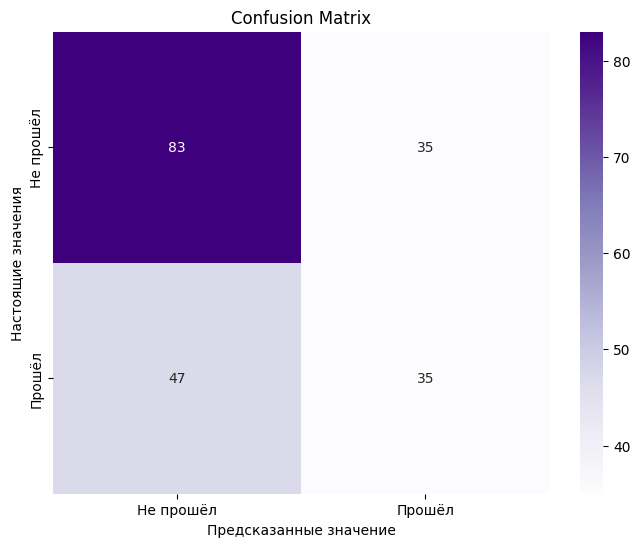

In [15]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, Y_train)
Y_pred = modelKNN.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
show_confusion_matrix(Y_test, Y_pred)

### Логистическая регрессия

Accuracy: 0.65
MSE score: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73       118
           1       0.61      0.41      0.49        82

    accuracy                           0.65       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.64      0.65      0.63       200



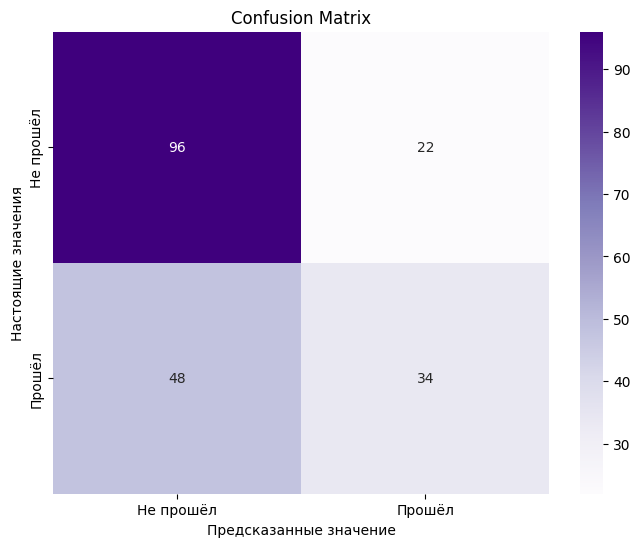

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("MSE score:", mean_squared_error(Y_test, Y_pred2))
print("Classification Report:\n", classification_report(Y_test, Y_pred2))
show_confusion_matrix(Y_test, Y_pred2)

### Линейная регрессия

In [17]:
def round_prediction(pred):
    y_pred = np.array(pred)
    if np.issubdtype(y_pred.dtype, np.floating):
        threshold = 0.5
        y_pred = (y_pred >= threshold).astype(int)

    return y_pred

Accuracy: 0.655
MSE score: 0.345
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.74       118
           1       0.61      0.43      0.50        82

    accuracy                           0.66       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.65      0.66      0.64       200



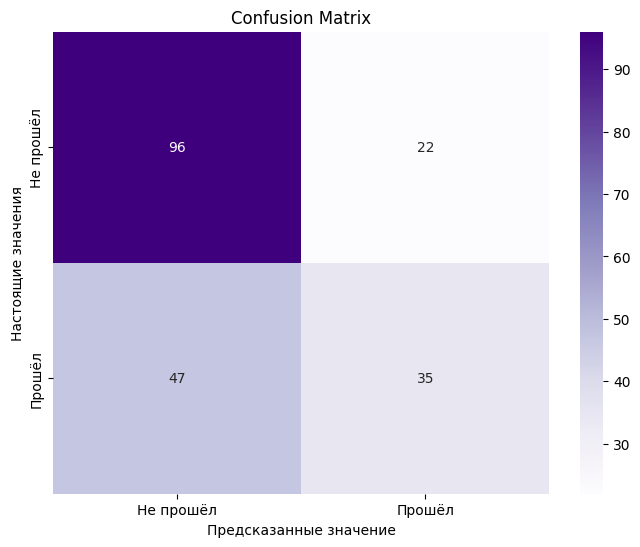

In [18]:
from sklearn.linear_model import LinearRegression

modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = round_prediction(modelLinearRegression.predict(X_test))

print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("MSE score:", mean_squared_error(Y_test, Y_pred3))
print("Classification Report:\n", classification_report(Y_test, Y_pred3))
show_confusion_matrix(Y_test, Y_pred3)


### Решающее дерево

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68       118
           1       0.53      0.49      0.51        82

    accuracy                           0.61       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.61      0.61      0.61       200



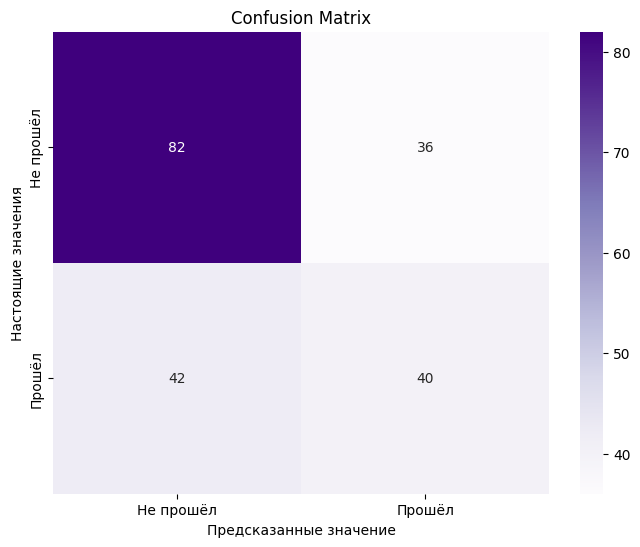

In [48]:
from sklearn.tree import DecisionTreeClassifier

modelDecisionTree = DecisionTreeClassifier(random_state=1)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred4))
print("Classification Report:\n", classification_report(Y_test, Y_pred4))
show_confusion_matrix(Y_test, Y_pred4)

### Случайный лес

Accuracy: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.67       118
           1       0.50      0.44      0.47        82

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.59      0.59       200



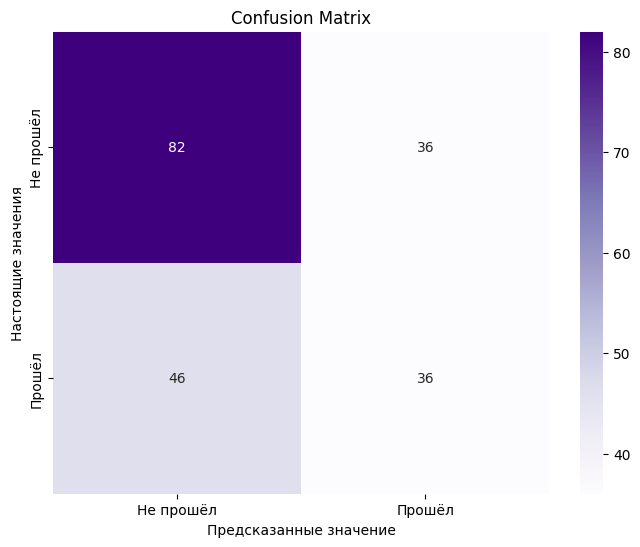

In [20]:
from sklearn.ensemble import RandomForestClassifier

modelRandomForest = RandomForestClassifier(n_estimators=100)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred5))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred5))
show_confusion_matrix(Y_test, Y_pred5)

### Градиентный бустинг

Accuracy: 0.595
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       118
           1       0.56      0.06      0.11        82

    accuracy                           0.59       200
   macro avg       0.58      0.51      0.42       200
weighted avg       0.58      0.59      0.48       200



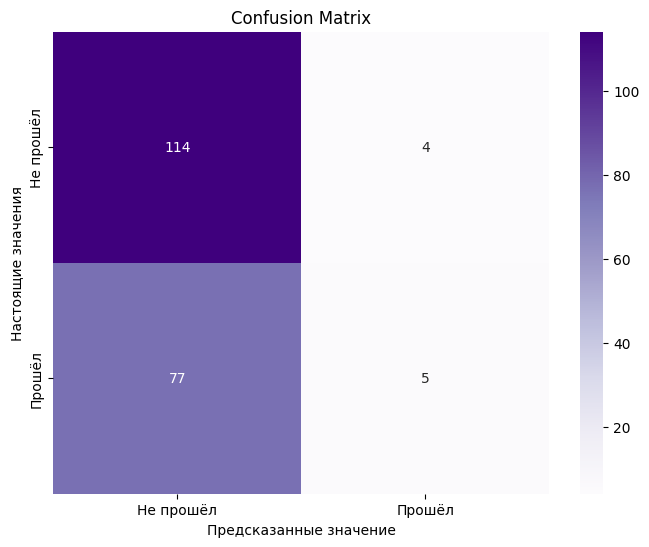

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

modelGradientBoosting = GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=0.01)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred6))
print("Classification Report:\n", classification_report(Y_test, Y_pred6))
show_confusion_matrix(Y_test, Y_pred6)

# Улучшение Бейзлайна

Визуализируем информацию о датасете и предобработаем его, чтобы улучшить точность классификации.

In [37]:
data_path = './students-performance-in-exams/StudentsPerformance.csv'  
data = pd.read_csv(data_path)

data['performance'] = data['math score'].apply(categorize_score)

print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
performance                    0
dtype: int64


Если отдельно рассматривать студентов, которые прошли подготовительные курсы, то среди них примерно половина прошла экзамен, а другая половина нет. Факт прохождения курсов почти не влияет на итоговый результат.

Среди не прошедших курсы ситуация обратная. Большинство студентов, которые не прошли подготовительные курсы не сдали экзамен, а значит факт не прохождения курсов имеет вклад в прохождение/непрохождение экзамена.

Буду использовать One-hot encoding для этого поля, чтобы устранить ординальность и подчеркнуть различное влияние на факт прохождения экзамена.

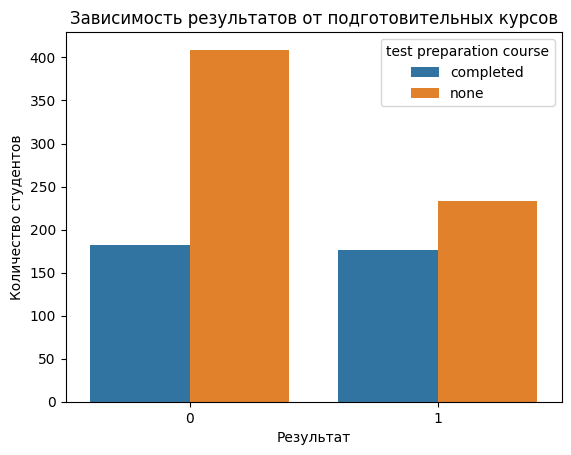

In [25]:
sns.countplot(hue='test preparation course' , data=data, x="performance")
plt.title("Зависимость результатов от подготовительных курсов")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

Рассовая принадлежность студента довольно сильно влияет на вероятность прохождения экзамена. Упорядочу рассы по проценту прохождения экзамена и закодирую их, сделав рассу порядковым признаком.

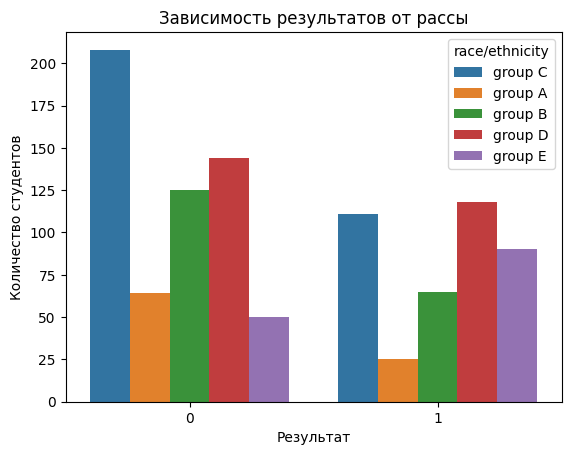

group A - 25 из 89 прошли экзамен, это 28.08988764044944%
group B - 65 из 190 прошли экзамен, это 34.21052631578947%
group C - 111 из 319 прошли экзамен, это 34.79623824451411%
group D - 118 из 262 прошли экзамен, это 45.038167938931295%
group E - 90 из 140 прошли экзамен, это 64.28571428571429%


In [30]:
sns.countplot(hue='race/ethnicity' , data=data, x="performance")
plt.title("Зависимость результатов от рассы")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

for gr in ["group A", "group B", "group C", "group D", "group E"]:
    count = (data["race/ethnicity"] == gr).sum()
    passed_count = (data[(data["race/ethnicity"] == gr) & (data["performance"] == 1)]).shape[0]
    print(gr + ' - ' + str(passed_count) + " из " + str(count) + " прошли экзамен, это " + str(passed_count/count*100) + "%")

Вероятность сдачи/не сдачи экзамена мужчинами почти одинаковая, в то время как у женщин больше вероятность не сдать экзамен. Буду использовать One-hot encoding для этого поля, чтобы устранить ординальность и подчеркнуть различное влияние факт прохождения экзамена.

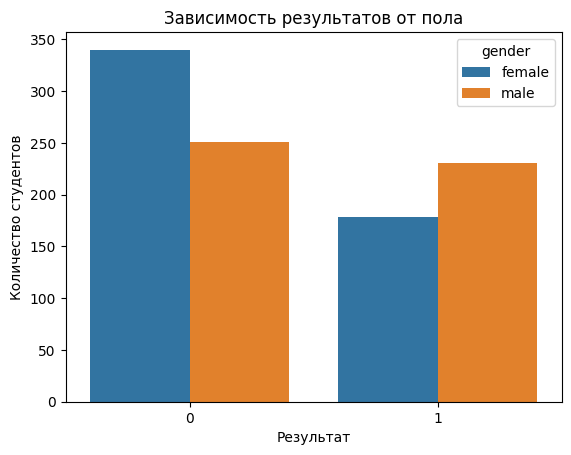

In [28]:
sns.countplot(hue='gender' , data=data, x="performance")
plt.title("Зависимость результатов от пола")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

Образование родителей имеет прямое влияние на шанс прохождения экзамена, чем оно выше, тем больше шанс ребенка на сдачу экзамена. Упорядочу образования по их уровню и сделаю из них порядковый признак.

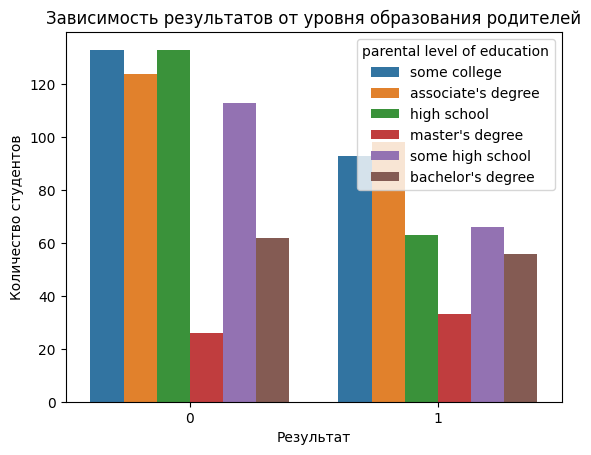

some college - 93 из 226 прошли экзамен, это 41.150442477876105%
associate's degree - 98 из 222 прошли экзамен, это 44.14414414414414%
high school - 63 из 196 прошли экзамен, это 32.142857142857146%
master's degree - 33 из 59 прошли экзамен, это 55.932203389830505%
some high school - 66 из 179 прошли экзамен, это 36.87150837988827%
bachelor's degree - 56 из 118 прошли экзамен, это 47.45762711864407%


In [31]:
sns.countplot(hue='parental level of education' , data=data, x="performance")
plt.title("Зависимость результатов от уровня образования родителей")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

for gr in ["some college", "associate's degree", "high school", "master's degree", "some high school", "bachelor's degree"]:
    count = (data["parental level of education"] == gr).sum()
    passed_count = (data[(data["parental level of education"] == gr) & (data["performance"] == 1)]).shape[0]
    print(gr + ' - ' + str(passed_count) + " из " + str(count) + " прошли экзамен, это " + str(passed_count/count*100) + "%")

Вероятность сдачи/не сдачи экзамена обеспеченными студентами почти одинаковая, в то время как у не обеспечнных студентов больше вероятность не сдать экзамен. Буду использовать One-hot encoding для этого поля, чтобы устранить ординальность и подчеркнуть различное влияние на факт прохождения экзамена.

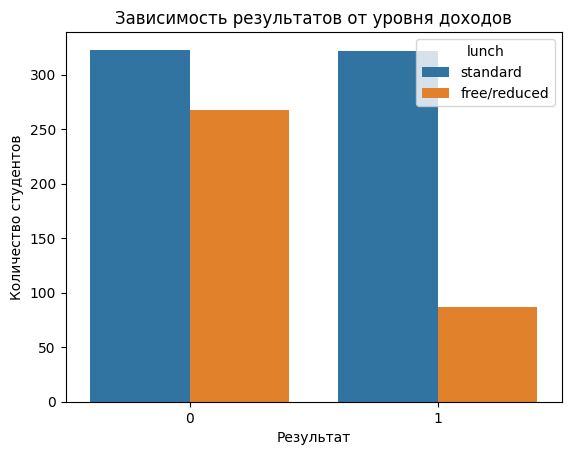

In [32]:
sns.countplot(hue='lunch' , data=data, x="performance")
plt.title("Зависимость результатов от уровня доходов")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

Больше половины студентов не сдало экзамен по математике.

Медианное количество баллов по математике - 66.0


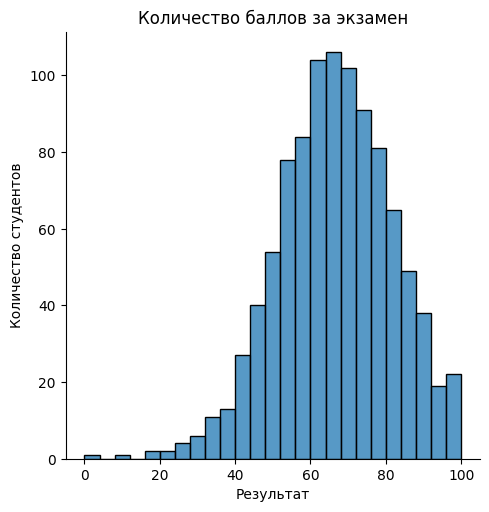

In [34]:
print('Медианное количество баллов по математике - ' + str(data['math score'].median()))

sns.displot(data['math score'])
plt.title("Количество баллов за экзамен")
plt.ylabel("Количество студентов")
plt.xlabel("Результат")
plt.show()

Классы не уравновешенны.

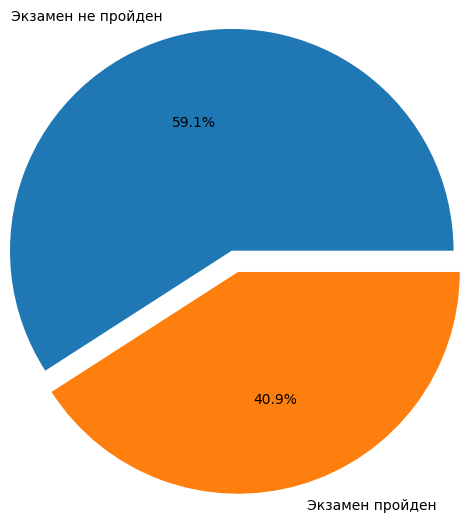

In [35]:
graf = data.groupby('performance')['performance'].count()
plt.pie(graf, explode=[0.05, 0.1], labels=['Экзамен не пройден', 'Экзамен пройден'], radius=1.5, autopct='%1.1f%%');

Теперь проделаем предложенные мной улучшения, затем нормализуем данные и сбалансируем классы.

In [38]:
data = pd.read_csv(data_path)
data['performance'] = data['math score'].apply(categorize_score)
data = data.drop(['math score', 'reading score', 'writing score', ], axis=1)

education_mapping = {
    "some high school": 1,
    "high school": 0,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 5,
    "master's degree": 4
}
data['parental level of education'] = data['parental level of education'].map(education_mapping)

race_mapping = {
    "group A": 0,
    "group B": 1,
    "group C": 1,
    "group D": 2,
    "group E": 4
}
data['race/ethnicity'] = data['race/ethnicity'].map(race_mapping)

def is_standard(lunch):
    if lunch == 'standard':
        return 1
    return 0
def is_reduced(gender):
    if gender == "free/reduced":
        return 1
    return 0
data['standard_lunch'] = data["lunch"].apply(is_standard)
data['reduced_lunch'] = data["lunch"].apply(is_reduced)

def is_male(gender):
    if gender == 'male':
        return 1
    return 0
def is_female(gender):
    if gender == 'female':
        return 1
    return 0
data['male'] = data["gender"].apply(is_male)
data['female'] = data["gender"].apply(is_female)

def pass_course(course):
    if course == 'completed':
        return 1
    return 0
def not_pass_course(course):
    if course == 'none':
        return 1
    return 0
data['pass_course'] = data['test preparation course'].apply(pass_course)
data['not_pass_course'] = data['test preparation course'].apply(not_pass_course)

data = data.drop(["gender", 'test preparation course', 'lunch'], axis=1)

X = data.drop('performance', axis=1)
Y = data['performance']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=y)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [42]:
X.head(10)

,race/ethnicity,parental level of education,standard_lunch,reduced_lunch,male,female,pass_course,not_pass_course
0,1,5,1,0,0,1,0,1
1,1,2,1,0,0,1,1,0
2,1,4,1,0,0,1,0,1
3,0,3,0,1,1,0,0,1
4,1,2,1,0,1,0,0,1
5,1,3,1,0,0,1,0,1
6,1,2,1,0,0,1,1,0
7,1,2,0,1,1,0,0,1
8,2,0,0,1,1,0,1,0
9,1,0,0,1,0,1,0,1


## Обучение моделей с улучшенным бейзлайном

### KNN

Accuracy: 0.655
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       118
           1       0.58      0.57      0.58        82

    accuracy                           0.66       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.66      0.65       200



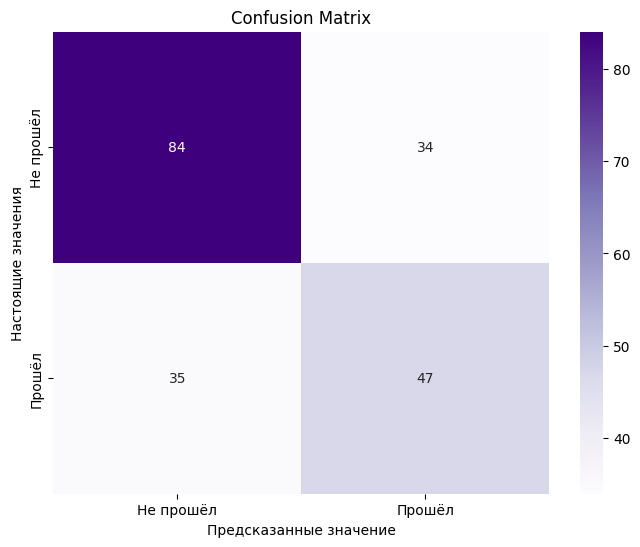

In [43]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, Y_train)
Y_pred = modelKNN.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
show_confusion_matrix(Y_test, Y_pred)

### Логистическая регрессия

Accuracy: 0.655
MSE score: 0.345
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       118
           1       0.57      0.63      0.60        82

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200



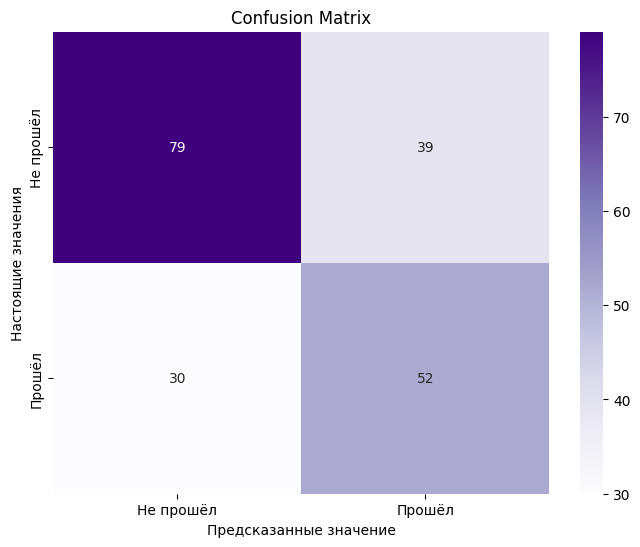

In [44]:
modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("MSE score:", mean_squared_error(Y_test, Y_pred2))
print("Classification Report:\n", classification_report(Y_test, Y_pred2))
show_confusion_matrix(Y_test, Y_pred2)

### Линейная регрессия

Accuracy: 0.655
MSE score: 0.345
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       118
           1       0.57      0.63      0.60        82

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200



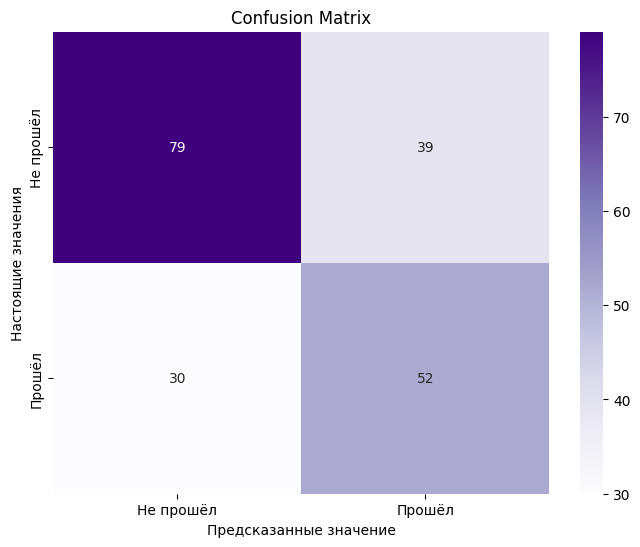

In [45]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = round_prediction(modelLinearRegression.predict(X_test))

print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("MSE score:", mean_squared_error(Y_test, Y_pred3))
print("Classification Report:\n", classification_report(Y_test, Y_pred3))
show_confusion_matrix(Y_test, Y_pred3)

### Решающее дерево

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       118
           1       0.55      0.50      0.52        82

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.62      0.62       200



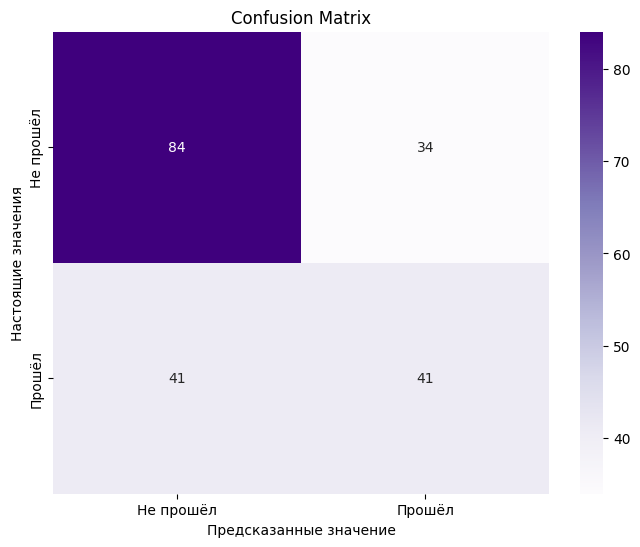

In [47]:
modelDecisionTree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, random_state=42)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred4))
print("Classification Report:\n", classification_report(Y_test, Y_pred4))
show_confusion_matrix(Y_test, Y_pred4)

### Случайный лес

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       118
           1       0.54      0.59      0.56        82

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.63      0.62      0.63       200



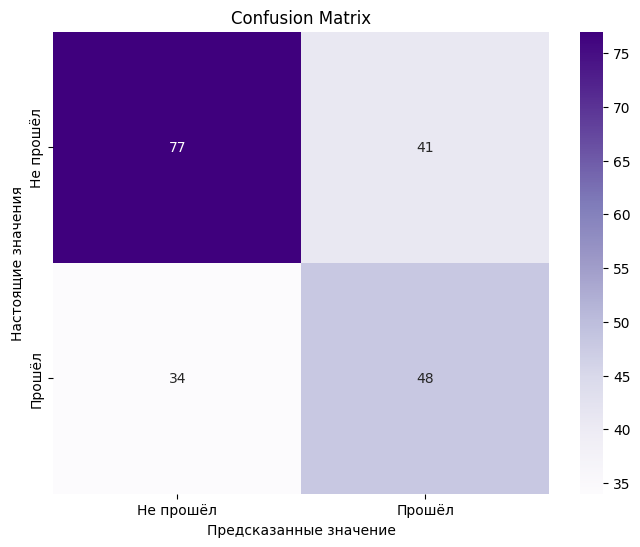

In [ ]:
modelRandomForest = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_leaf=4, max_depth=10)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred5))
print("Classification Report:\n", classification_report(Y_test, Y_pred5))
show_confusion_matrix(Y_test, Y_pred5)

### Градиентный бустинг

Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       118
           1       0.59      0.57      0.58        82

    accuracy                           0.67       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.67      0.66       200



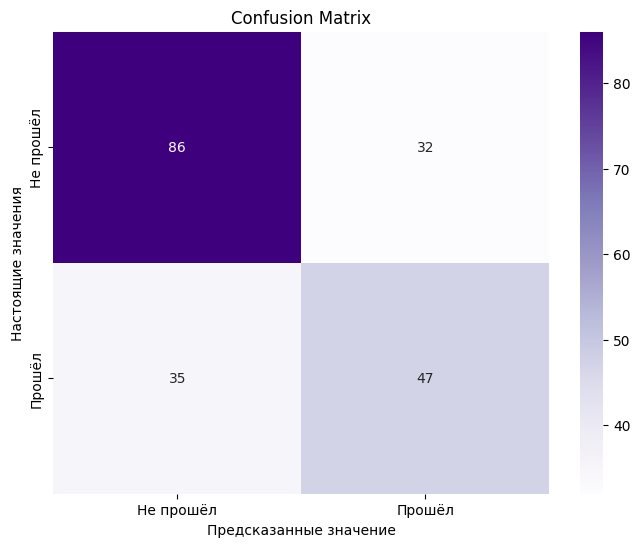

In [51]:
modelGradientBoosting = GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=0.01)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred6))
print("Classification Report:\n", classification_report(Y_test, Y_pred6))
show_confusion_matrix(Y_test, Y_pred6)

# Самостоятельная реализация алгоритмов машинного обучения

## Начальный бейзлайн

### KNN

In [52]:
data_path = './students-performance-in-exams/StudentsPerformance.csv' 
data = pd.read_csv(data_path)

def categorize_score(score):
    if score >= 70:
        return 1
    return 0

data['performance'] = data['math score'].apply(categorize_score)
data = data.drop(['math score', 'reading score', 'writing score'], axis=1)

label_encoders = {}
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop('performance', axis=1)
Y = data['performance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [53]:
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

class MyKNN:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors

    def _compute_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def fit(self, features, labels):
        self.x_train = np.array(features)
        self.y_train = np.array(labels)

    def predict(self, test_features):
        test_features = np.array(test_features, dtype=float)
        predictions = []

        for feature in test_features:
            distances = np.array([self._compute_distance(feature, x) for x in self.x_train])
            nearest_indices = np.argsort(distances)[:self.num_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)

        return np.array(predictions)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       118
           1       0.58      0.55      0.56        82

    accuracy                           0.65       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.65      0.65      0.65       200



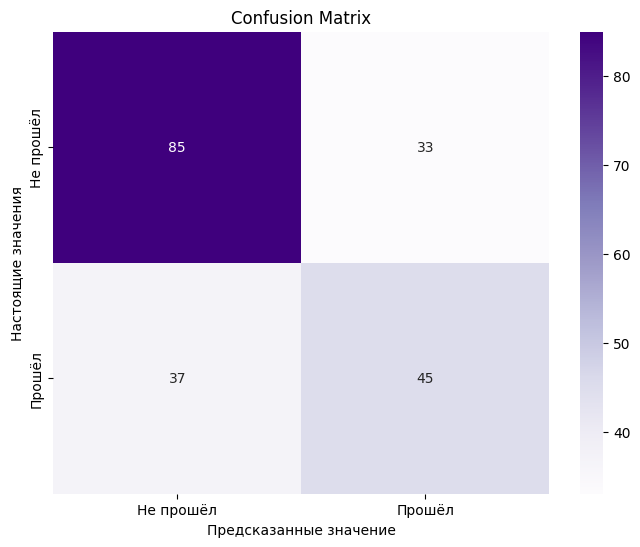

In [57]:
model = MyKNN(num_neighbors=5)
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred1))
print("Classification Report:\n", classification_report(Y_test, Y_pred1))
show_confusion_matrix(Y_test, Y_pred1)

### Логистическая регрессия

In [55]:
import numpy as np

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, features, labels):
        features = np.array(features)
        labels = np.array(labels)
        
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, test_features):
        linear_model = np.dot(test_features, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, test_features):
        probabilities = self.predict_proba(test_features)
        return [1 if p > 0.5 else 0 for p in probabilities]

MSE score: 0.38
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.65       118
           1       0.53      0.63      0.58        82

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.63      0.62      0.62       200



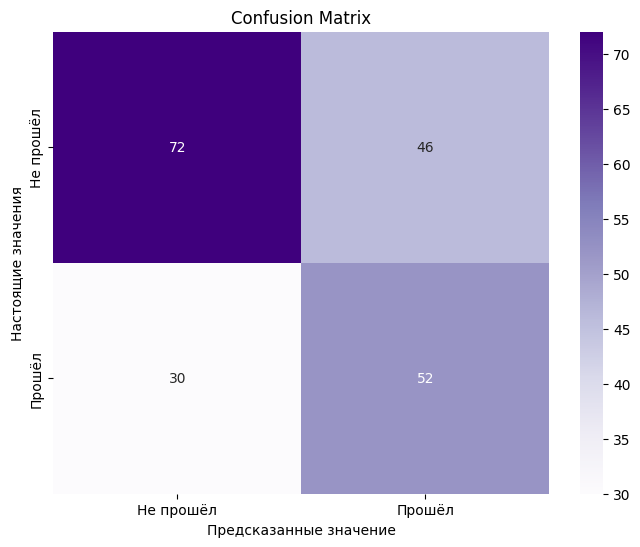

In [58]:
modelLogisticRegression = MyLogisticRegression(learning_rate=0.01)
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("MSE score:", mean_squared_error(Y_test, Y_pred2))
print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("Classification Report:\n", classification_report(Y_test, Y_pred2))
show_confusion_matrix(Y_test, Y_pred2)

### Линейная регрессия

In [60]:
import numpy as np

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, features, labels):
        features = np.array(features)
        labels = np.array(labels)

        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            y_predicted = np.dot(features, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        return np.dot(test_features, self.weights) + self.bias


In [ ]:
modelLinearRegression = MyLinearRegression(learning_rate=0.1)
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = round_prediction(modelLinearRegression.predict(X_test))

print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("MSE score:", mean_squared_error(Y_test, Y_pred3))
print("Classification Report:\n", classification_report(Y_test, Y_pred3))
show_confusion_matrix(Y_test, Y_pred3)

Accuracy: 0.655
MSE score: 0.345

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       118
           1       0.57      0.63      0.60        82

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200



### Решающее дерево

In [62]:
import numpy as np

class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        return 1 - np.sum(probabilities ** 2)

    def _split(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return (X[left_mask], y[left_mask]), (X[right_mask], y[right_mask])

    def _best_split(self, X, y):
        best_feature, best_threshold, best_gain = None, None, -np.inf
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                (left_X, left_y), (right_X, right_y) = self._split(X, y, feature_index, threshold)
                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                gain = self._information_gain(y, left_y, right_y)
                if gain > best_gain:
                    best_feature, best_threshold, best_gain = feature_index, threshold, gain
        return best_feature, best_threshold

    def _information_gain(self, parent_y, left_y, right_y):
        weight_left = len(left_y) / len(parent_y)
        weight_right = len(right_y) / len(parent_y)
        return self._gini(parent_y) - (weight_left * self._gini(left_y) + weight_right * self._gini(right_y))

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {"type": "leaf", "class": np.bincount(y.astype(int)).argmax()}

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {"type": "leaf", "class": np.bincount(y.astype(int)).argmax()}

        (left_X, left_y), (right_X, right_y) = self._split(X, y, feature, threshold)
        return {
            "type": "node",
            "feature": feature,
            "threshold": threshold,
            "left": self._build_tree(left_X, left_y, depth + 1),
            "right": self._build_tree(right_X, right_y, depth + 1)
        }

    def _predict_sample(self, sample, tree):
        if tree["type"] == "leaf":
            return tree["class"]
        if sample[tree["feature"]] <= tree["threshold"]:
            return self._predict_sample(sample, tree["left"])
        else:
            return self._predict_sample(sample, tree["right"])

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       118
           1       0.50      0.49      0.49        82

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.59      0.59      0.59       200



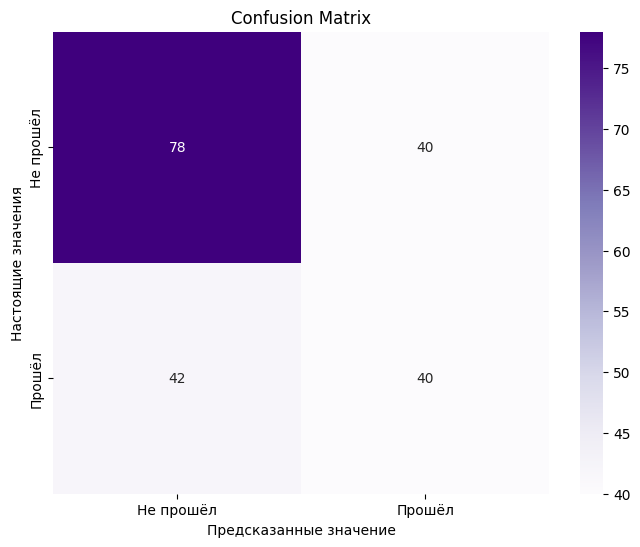

In [64]:
modelDecisionTree = MyDecisionTreeClassifier(max_depth=10)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred4))
print("Classification Report:\n", classification_report(Y_test, Y_pred4))
show_confusion_matrix(Y_test, Y_pred4)

### Случайный лес

In [65]:
import numpy as np

class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        idxs = np.random.choice(len(X), size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []  
        for _ in range(self.n_trees):
            tree = MyDecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])

        return np.array([np.bincount(predictions).argmax() for predictions in tree_predictions.T])

Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       118
           1       0.58      0.63      0.61        82

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200



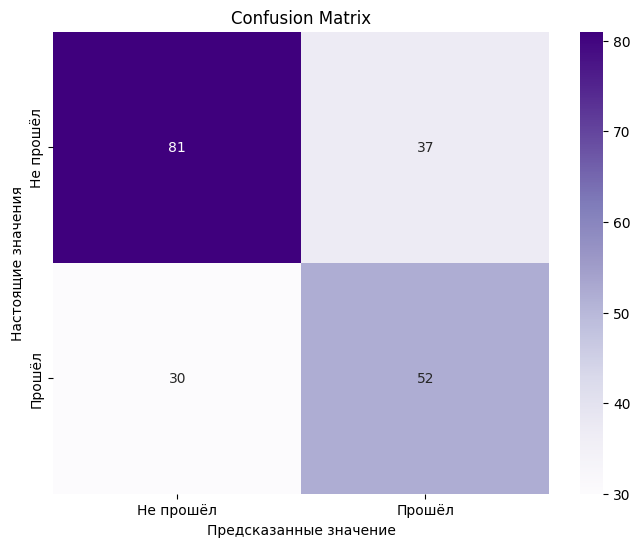

In [66]:
modelRandomForest = MyRandomForest(n_trees=3, max_depth=3)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred5))
print("Classification Report:\n", classification_report(Y_test, Y_pred5))
show_confusion_matrix(Y_test, Y_pred5)

### Градиентный бустинг

In [68]:
import numpy as np

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=10):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        y = np.array(y)
        self.classes_ = np.unique(y)
        y = np.where(y == self.classes_[1], 1, 0)
        p = np.mean(y)
        self.initial_prediction = np.log(p / (1 - p))
        predictions = np.full(X.shape[0], self.initial_prediction)
        for _ in range(self.n_estimators):
            residuals = y - self.sigmoid(predictions)
            tree = MyDecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            self.trees.append(tree)
            predictions += self.learning_rate * update

    def predict_proba(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        probabilities = self.sigmoid(predictions)
        return np.column_stack([1 - probabilities, probabilities])

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.where(proba[:, 1] > 0.5, self.classes_[1], self.classes_[0])

In [70]:
modelGradientBoosting = MyGradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=100)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)
Y_pred6 = round_prediction(Y_pred6)

print("Accuracy:", accuracy_score(Y_test, Y_pred6))
print("Classification Report:\n", classification_report(Y_test, Y_pred6))

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       118
           1       0.00      0.00      0.00        82

    accuracy                           0.59       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.35      0.59      0.44       200



c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

## С улучшенным бейзлайном

In [71]:
data = pd.read_csv(data_path)
data['performance'] = data['math score'].apply(categorize_score)
data = data.drop(['math score', 'reading score', 'writing score', ], axis=1)

education_mapping = {
    "some high school": 1,
    "high school": 0,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 5,
    "master's degree": 4
}
data['parental level of education'] = data['parental level of education'].map(education_mapping)

race_mapping = {
    "group A": 0,
    "group B": 1,
    "group C": 1,
    "group D": 2,
    "group E": 4
}
data['race/ethnicity'] = data['race/ethnicity'].map(race_mapping)

def is_standard(lunch):
    if lunch == 'standard':
        return 1
    return 0
def is_reduced(gender):
    if gender == "free/reduced":
        return 1
    return 0
data['standard_lunch'] = data["lunch"].apply(is_standard)
data['reduced_lunch'] = data["lunch"].apply(is_reduced)

def is_male(gender):
    if gender == 'male':
        return 1
    return 0
def is_female(gender):
    if gender == 'female':
        return 1
    return 0
data['male'] = data["gender"].apply(is_male)
data['female'] = data["gender"].apply(is_female)

def pass_course(course):
    if course == 'completed':
        return 1
    return 0
def not_pass_course(course):
    if course == 'none':
        return 1
    return 0
data['pass_course'] = data['test preparation course'].apply(pass_course)
data['not_pass_course'] = data['test preparation course'].apply(not_pass_course)

data = data.drop(["gender", 'test preparation course', 'lunch'], axis=1)

X = data.drop('performance', axis=1)
Y = data['performance']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=y)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

### KNN

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       118
           1       0.58      0.55      0.56        82

    accuracy                           0.65       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.65      0.65      0.65       200



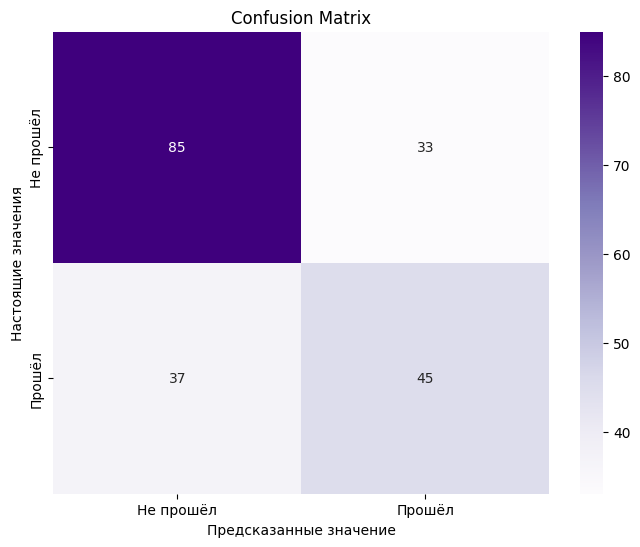

In [72]:
modelKNN = MyKNN(num_neighbors=5)
modelKNN.fit(X_train, Y_train)
Y_pred1 = modelKNN.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred1))
print("Classification Report:\n", classification_report(Y_test, Y_pred1))
show_confusion_matrix(Y_test, Y_pred1)

### Логистическая регрессия 

MSE score: 0.38
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.65       118
           1       0.53      0.63      0.58        82

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.63      0.62      0.62       200



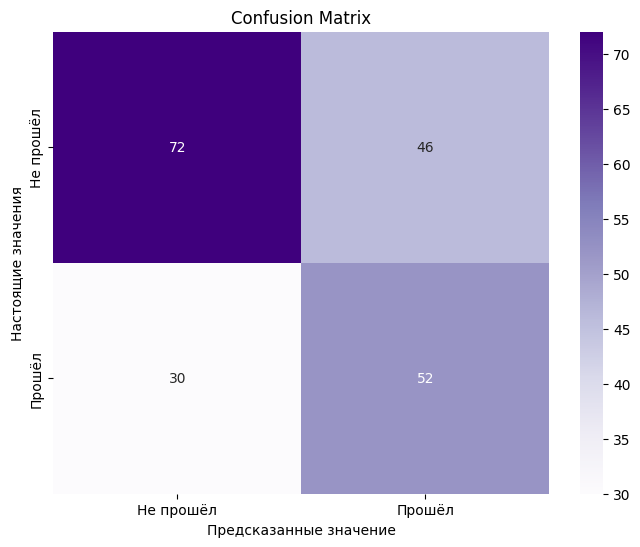

In [73]:
modelLogisticRegression = MyLogisticRegression(learning_rate=0.01)
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("MSE score:", mean_squared_error(Y_test, Y_pred2))
print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("Classification Report:\n", classification_report(Y_test, Y_pred2))
show_confusion_matrix(Y_test, Y_pred2)

### Линейная регрессия

Accuracy: 0.655
MSE score: 0.345
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       118
           1       0.57      0.63      0.60        82

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200



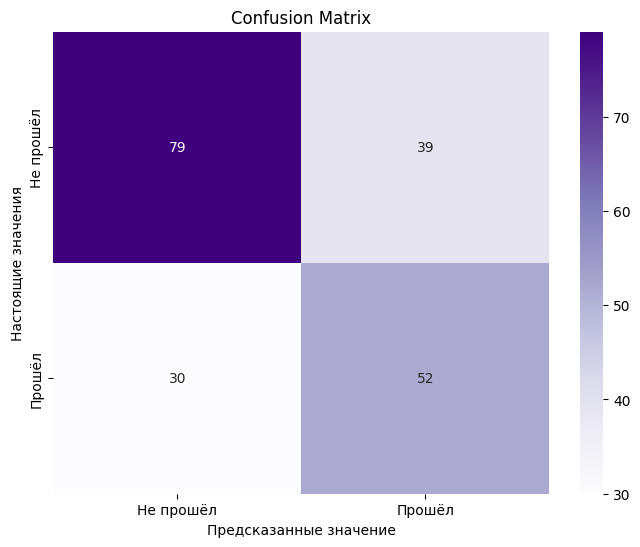

In [74]:
modelLinearRegression = MyLinearRegression(learning_rate=0.1)
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = round_prediction(modelLinearRegression.predict(X_test))

print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("MSE score:", mean_squared_error(Y_test, Y_pred3))
print("Classification Report:\n", classification_report(Y_test, Y_pred3))
show_confusion_matrix(Y_test, Y_pred3)

### Решающее дерево

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       118
           1       0.50      0.49      0.49        82

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.59      0.59      0.59       200



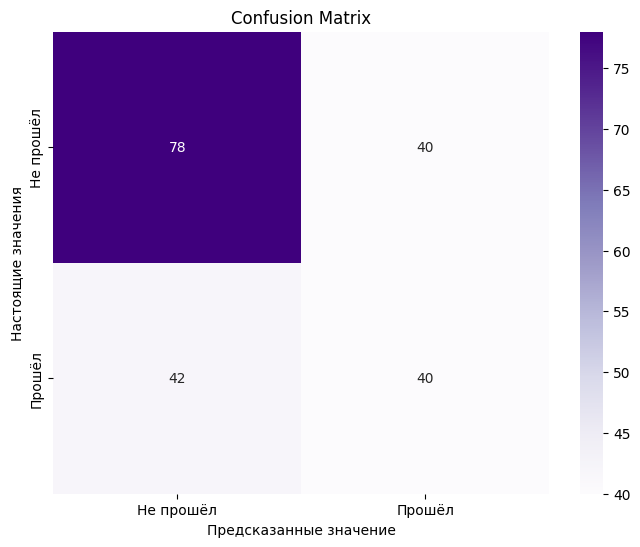

In [75]:
modelDecisionTree = MyDecisionTreeClassifier(max_depth=10)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred4))
print("Classification Report:\n", classification_report(Y_test, Y_pred4))
show_confusion_matrix(Y_test, Y_pred4)

### Случайный лес

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       118
           1       0.61      0.52      0.57        82

    accuracy                           0.67       200
   macro avg       0.66      0.65      0.65       200
weighted avg       0.66      0.67      0.66       200



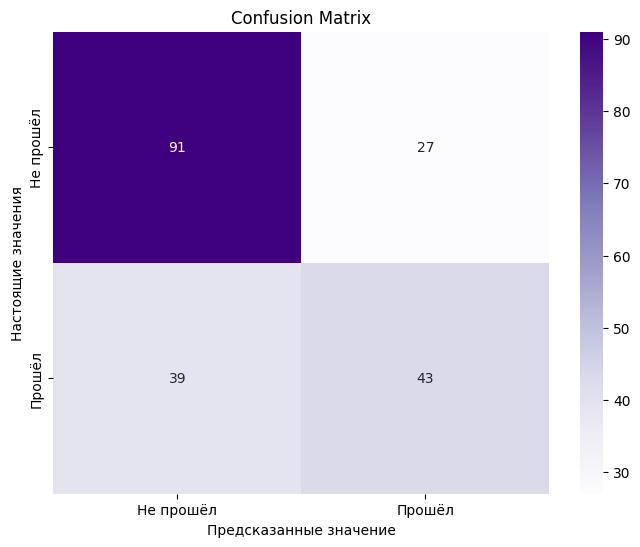

In [83]:
modelRandomForest = MyRandomForest(n_trees=7, max_depth=5)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred5))
print("Classification Report:\n", classification_report(Y_test, Y_pred5))
show_confusion_matrix(Y_test, Y_pred5)

### Градиентный бустинг

In [84]:
modelGradientBoosting = MyGradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=100)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)
Y_pred6 = round_prediction(Y_pred6)

print("Accuracy:", accuracy_score(Y_test, Y_pred6))
print("Classification Report:\n", classification_report(Y_test, Y_pred6))

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       118
           1       0.00      0.00      0.00        82

    accuracy                           0.59       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.35      0.59      0.44       200



c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

В ходе выполнения данной работы мне удалось улучшить базовый результат за счёт применения различных техник предобработки данных и реализовать несколько алгоритмов машинного обучения: KNN, логистическую и линейную регрессии, градиентный бустинг, случайный лес и решающее дерево.

Реализованные модели продемонстрировали достойную точность, в некоторых случаях сопоставимую или даже превышающую результаты, достигнутые библиотечными моделями из scikit-learn. Это указывает на их применимость для решения задач на небольших и средних датасетах. Однако, для сложных или больших наборов данных целесообразнее использовать высокооптимизированные реализации из scikit-learn, которые обеспечивают более высокую производительность и включают встроенные механизмы для работы с разнообразными характеристиками данных.